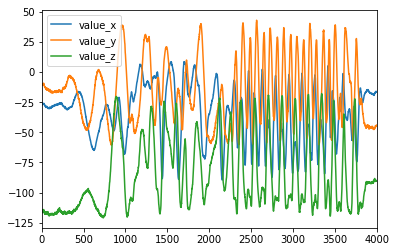

minValue = -89.546364
maxValue = 8.616715
rangeValue = 98.163079
offsetValue = 40.4648245
scaleValue = 0.9066545274114721
minValue = -60.460125
maxValue = 42.955902
rangeValue = 103.416027
offsetValue = 8.752111499999998
scaleValue = 0.8606016164206347
minValue = -120.98053
maxValue = -17.892797
rangeValue = 103.087733
offsetValue = 69.43666350000001
scaleValue = 0.8633422950527004


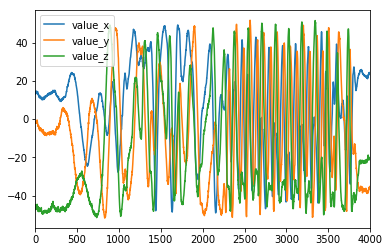

In [26]:
import pandas as pd 
import matplotlib.pyplot as plt

def plotVector3d(filename):
    df = pd.read_csv(
        filename,
        usecols=["value_x", "value_y", "value_z"],
        delim_whitespace=True,
        skiprows=1)
    df.plot.line()
    plt.show()

def plotVector1d(filename):
    df = pd.read_csv(
        filename,
        usecols=["value_x"],
        delim_whitespace=True,
        skiprows=1)
    df.plot.line()
    plt.show()

def plotAzimuth(filename):
    df = pd.read_csv(
        filename,
        usecols=["deviceDirectionDegrees", "northDirectionRadians"],
        delim_whitespace=True,
        skiprows=1)
    df.plot.line()
    plt.show()
    
def plotAzimuthSensor(filename):
    df = pd.read_csv(
        filename,
        usecols=[
            "m_x", "m_y", "m_z",
            "a_x", "a_y", "a_z",
            "g_x", "g_y", "g_z"],
        delim_whitespace=True,
        skiprows=1)
    df.plot.line()
    plt.show()

def calibrateMagnetometerPrint(minValue, maxValue):
    rangeValue = maxValue - minValue
    offsetValue = rangeValue / 2. - maxValue
    print("minValue = {}".format(minValue))
    print("maxValue = {}".format(maxValue))
    print("rangeValue = {}".format(rangeValue))
    print("offsetValue = {}".format(offsetValue))
    print("scaleValue = {}".format(89. / rangeValue))
    
def calibrateMagnetometerFix(value, offset, scale):
    return (value + offset) * scale

def calibrateMagnetometer(filename):
    df = pd.read_csv(
        filename,
        usecols=["value_x", "value_y", "value_z"],
        delim_whitespace=True,
        skiprows=1)
    df.plot.line()
    plt.show()
    
    calibrateMagnetometerPrint(df["value_x"].min(), df["value_x"].max())
    calibrateMagnetometerPrint(df["value_y"].min(), df["value_y"].max())
    calibrateMagnetometerPrint(df["value_z"].min(), df["value_z"].max())
    
    df['value_x'] = df['value_x'].apply((lambda x: calibrateMagnetometerFix(x, 40.4648245, 1.)))
    df['value_y'] = df['value_y'].apply((lambda x: calibrateMagnetometerFix(x, 8.752111499999998, 1.)))
    df['value_z'] = df['value_z'].apply((lambda x: calibrateMagnetometerFix(x, 69.43666350000001, 1.)))
    df.plot.line()
    plt.show()

def printFile(filename):
    myfile = open(filename)
    for line in myfile:
        print(line.strip())
    myfile.close()

file_date = "2019_07_09_01_44_47"
calibrateMagnetometer("magnetometer_{}.txt".format(file_date))
# plotVector3d("magnetometer_{}.txt".format(file_date))
# plotVector3d("magnetometer_filtered_{}.txt".format(file_date))
# plotVector3d("accelerometer_{}.txt".format(file_date))
# plotVector3d("gyroscope_{}.txt".format(file_date))
# plotAzimuth("azimuth_{}.txt".format(file_date))